In [13]:
import matplotlib.pyplot as plt
import numpy as np
from wrf import to_np, getvar, get_basemap, latlon_coords
from netCDF4 import Dataset
from metpy.plots import colortables
from matplotlib import path
import geopandas as gpd
import shapely
from matplotlib.patches import Polygon
#import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
import matplotlib.patches as patches
from descartes import PolygonPatch
import xarray as xr
from scipy.ndimage import gaussian_filter as gfilt

In [14]:
#the control run
wrf_control_orig_0 = 'wrf4km_ens_2'

wrf_gombasn_cool_1 = 'wrf4km_sst_gombasin_cool_1'
wrf_gombasn_cool_2 = 'wrf4km_sst_gombasin_cool_2'
wrf_gomplum_cool_1 = 'wrf4km_sst_gomplume_cool_1'
wrf_gomplum_cool_2 = 'wrf4km_sst_gomplume_cool_2'
wrf_murgion_cool_1 = 'wrf4km_sst_muregion_cool_1'
wrf_murgion_cool_2 = 'wrf4km_sst_muregion_cool_2'

wrf_gombasn_warm_1 = 'wrf4km_sst_gombasin_warm_1'
wrf_gombasn_warm_2 = 'wrf4km_sst_gombasin_warm_2'
wrf_gomplum_warm_1 = 'wrf4km_sst_gomplume_warm_1'
wrf_gomplum_warm_2 = 'wrf4km_sst_gomplume_warm_2'
wrf_murgion_warm_1 = 'wrf4km_sst_muregion_warm_1'
wrf_murgion_warm_2 = 'wrf4km_sst_muregion_warm_2'

UH_thresholds = np.array([60])

mask_data = xr.open_dataset('/glade/work/molina/DATA/usstates_shapefiles/conus_mask_res_80.nc')


def percent_change(data1,data2,data_mask):
   
    return np.divide((data1.UH_dates.where(data_mask.conus.values, 0).sum()-
                       data2.UH_dates.where(data_mask.conus.values, 0).sum()),
                       data2.UH_dates.where(data_mask.conus.values, 0).sum())*100


def percent_change_scalar(data1,data2):
   
    return np.divide((data1-data2),data2)*100

In [15]:
UH_threshold = 60


control_orig_0=xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/'+wrf_control_orig_0+'/newvert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_control_orig_0 = np.where(mask_data.conus.values,control_orig_0.where(control_orig_0.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gombasn_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gombasn_cool_1 = np.where(mask_data.conus.values,gombasn_cool_1.where(gombasn_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gombasn_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gombasn_cool_2 = np.where(mask_data.conus.values,gombasn_cool_2.where(gombasn_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gomplum_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gomplum_cool_1 = np.where(mask_data.conus.values,gomplum_cool_1.where(gomplum_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gomplum_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gomplum_cool_2 = np.where(mask_data.conus.values,gomplum_cool_2.where(gomplum_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

murgion_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_murgion_cool_1 = np.where(mask_data.conus.values,murgion_cool_1.where(murgion_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

murgion_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_murgion_cool_2 = np.where(mask_data.conus.values,murgion_cool_2.where(murgion_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gombasn_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gombasn_warm_1 = np.where(mask_data.conus.values,gombasn_warm_1.where(gombasn_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gombasn_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gombasn_warm_2 = np.where(mask_data.conus.values,gombasn_warm_2.where(gombasn_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gomplum_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gomplum_warm_1 = np.where(mask_data.conus.values,gomplum_warm_1.where(gomplum_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gomplum_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gomplum_warm_2 = np.where(mask_data.conus.values,gomplum_warm_2.where(gomplum_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

murgion_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_murgion_warm_1 = np.where(mask_data.conus.values,murgion_warm_1.where(murgion_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

murgion_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_murgion_warm_2 = np.where(mask_data.conus.values,murgion_warm_2.where(murgion_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)


In [16]:
print('Total 48-h')
print(' ')
print('MU -1: ', round(percent_change_scalar(new_murgion_cool_1.sum(),new_control_orig_0.sum())))
print('MU -2: ', round(percent_change_scalar(new_murgion_cool_2.sum(),new_control_orig_0.sum())))
print('PL -1: ', round(percent_change_scalar(new_gomplum_cool_1.sum(),new_control_orig_0.sum())))
print('PL -2: ', round(percent_change_scalar(new_gomplum_cool_2.sum(),new_control_orig_0.sum())))
print('BS -1: ', round(percent_change_scalar(new_gombasn_cool_1.sum(),new_control_orig_0.sum())))
print('BS -2: ', round(percent_change_scalar(new_gombasn_cool_2.sum(),new_control_orig_0.sum())))
print(' ')
print('MU +1: ', round(percent_change_scalar(new_murgion_warm_1.sum(),new_control_orig_0.sum())))
print('MU +2: ', round(percent_change_scalar(new_murgion_warm_2.sum(),new_control_orig_0.sum())))
print('PL +1: ', round(percent_change_scalar(new_gomplum_warm_1.sum(),new_control_orig_0.sum())))
print('PL +2: ', round(percent_change_scalar(new_gomplum_warm_2.sum(),new_control_orig_0.sum())))
print('BS +1: ', round(percent_change_scalar(new_gombasn_warm_1.sum(),new_control_orig_0.sum())))
print('BS +2: ', round(percent_change_scalar(new_gombasn_warm_2.sum(),new_control_orig_0.sum())))

Total 48-h
 
MU -1:  3.0
MU -2:  5.0
PL -1:  -14.0
PL -2:  4.0
BS -1:  5.0
BS -2:  7.0
 
MU +1:  9.0
MU +2:  9.0
PL +1:  7.0
PL +2:  11.0
BS +1:  -8.0
BS +2:  -9.0


In [17]:
print('First 12-h')
timeint = 0
print(' ')
print('MU -1: ', round(percent_change_scalar(new_murgion_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU -2: ', round(percent_change_scalar(new_murgion_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -1: ', round(percent_change_scalar(new_gomplum_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -2: ', round(percent_change_scalar(new_gomplum_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -1: ', round(percent_change_scalar(new_gombasn_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -2: ', round(percent_change_scalar(new_gombasn_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print(' ')
print('MU +1: ', round(percent_change_scalar(new_murgion_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU +2: ', round(percent_change_scalar(new_murgion_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +1: ', round(percent_change_scalar(new_gomplum_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +2: ', round(percent_change_scalar(new_gomplum_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +1: ', round(percent_change_scalar(new_gombasn_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +2: ', round(percent_change_scalar(new_gombasn_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))

First 12-h
 
MU -1:  -80.0
MU -2:  -30.0
PL -1:  -70.0
PL -2:  -10.0
BS -1:  20.0
BS -2:  50.0
 
MU +1:  150.0
MU +2:  110.0
PL +1:  0.0
PL +2:  70.0
BS +1:  -10.0
BS +2:  -50.0


In [18]:
print('First 12-h')
timeint = 0
print(' ')
MU_cool_1=round(percent_change_scalar(new_murgion_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
MU_cool_2=round(percent_change_scalar(new_murgion_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
PL_cool_1=round(percent_change_scalar(new_gomplum_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
PL_cool_2=round(percent_change_scalar(new_gomplum_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
BS_cool_1=round(percent_change_scalar(new_gombasn_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
BS_cool_2=round(percent_change_scalar(new_gombasn_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
print(' ')
MU_warm_1=round(percent_change_scalar(new_murgion_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
MU_warm_2=round(percent_change_scalar(new_murgion_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
PL_warm_1=round(percent_change_scalar(new_gomplum_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
PL_warm_2=round(percent_change_scalar(new_gomplum_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
BS_warm_1=round(percent_change_scalar(new_gombasn_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
BS_warm_2=round(percent_change_scalar(new_gombasn_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))

First 12-h
 
 


In [8]:
print('Second 12-h')
timeint = 1
print(' ')
print('MU -1: ', round(percent_change_scalar(new_murgion_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU -2: ', round(percent_change_scalar(new_murgion_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -1: ', round(percent_change_scalar(new_gomplum_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -2: ', round(percent_change_scalar(new_gomplum_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -1: ', round(percent_change_scalar(new_gombasn_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -2: ', round(percent_change_scalar(new_gombasn_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print(' ')
print('MU +1: ', round(percent_change_scalar(new_murgion_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU +2: ', round(percent_change_scalar(new_murgion_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +1: ', round(percent_change_scalar(new_gomplum_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +2: ', round(percent_change_scalar(new_gomplum_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +1: ', round(percent_change_scalar(new_gombasn_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +2: ', round(percent_change_scalar(new_gombasn_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))

Second 12-h
 
MU -1:  9.0
MU -2:  7.0
PL -1:  -22.0
PL -2:  7.0
BS -1:  12.0
BS -2:  25.0
 
MU +1:  6.0
MU +2:  6.0
PL +1:  9.0
PL +2:  7.0
BS +1:  -11.0
BS +2:  -17.0


In [9]:
print('Third 12-h')
timeint = 2
print(' ')
print('MU -1: ', round(percent_change_scalar(new_murgion_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU -2: ', round(percent_change_scalar(new_murgion_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -1: ', round(percent_change_scalar(new_gomplum_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -2: ', round(percent_change_scalar(new_gomplum_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -1: ', round(percent_change_scalar(new_gombasn_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -2: ', round(percent_change_scalar(new_gombasn_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print(' ')
print('MU +1: ', round(percent_change_scalar(new_murgion_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU +2: ', round(percent_change_scalar(new_murgion_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +1: ', round(percent_change_scalar(new_gomplum_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +2: ', round(percent_change_scalar(new_gomplum_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +1: ', round(percent_change_scalar(new_gombasn_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +2: ', round(percent_change_scalar(new_gombasn_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))

Third 12-h
 
MU -1:  2.0
MU -2:  8.0
PL -1:  -6.0
PL -2:  10.0
BS -1:  2.0
BS -2:  -2.0
 
MU +1:  12.0
MU +2:  7.0
PL +1:  19.0
PL +2:  18.0
BS +1:  2.0
BS +2:  -5.0


In [10]:
print('Fourth 12-h')
timeint = 3
print(' ')
print('MU -1: ', round(percent_change_scalar(new_murgion_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU -2: ', round(percent_change_scalar(new_murgion_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -1: ', round(percent_change_scalar(new_gomplum_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -2: ', round(percent_change_scalar(new_gomplum_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -1: ', round(percent_change_scalar(new_gombasn_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -2: ', round(percent_change_scalar(new_gombasn_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print(' ')
print('MU +1: ', round(percent_change_scalar(new_murgion_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU +2: ', round(percent_change_scalar(new_murgion_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +1: ', round(percent_change_scalar(new_gomplum_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +2: ', round(percent_change_scalar(new_gomplum_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +1: ', round(percent_change_scalar(new_gombasn_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +2: ', round(percent_change_scalar(new_gombasn_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))

Fourth 12-h
 
MU -1:  15.0
MU -2:  2.0
PL -1:  2.0
PL -2:  -10.0
BS -1:  -10.0
BS -2:  -18.0
 
MU +1:  -28.0
MU +2:  -8.0
PL +1:  -18.0
PL +2:  -10.0
BS +1:  -25.0
BS +2:  10.0


In [20]:
#the control run
wrf_control_orig_0 = 'wrf4km_ens_2'

wrf_gombasn_cool_1 = 'WRF10/WRF/run'
wrf_gombasn_cool_2 = 'WRF9/WRF/run'
wrf_gomplum_cool_1 = 'WRF6/WRF/run'
wrf_gomplum_cool_2 = 'WRF5/WRF/run'
wrf_murgion_cool_1 = 'WRF2/WRF/run'
wrf_murgion_cool_2 = 'WRF1/WRF/run'

wrf_gombasn_warm_1 = 'WRF11/WRF/run'
wrf_gombasn_warm_2 = 'WRF12/WRF/run'
wrf_gomplum_warm_1 = 'WRF7/WRF/run'
wrf_gomplum_warm_2 = 'WRF8/WRF/run'
wrf_murgion_warm_1 = 'WRF3/WRF/run'
wrf_murgion_warm_2 = 'WRF4/WRF/run'

UH_thresholds = np.array([60])

mask_data = xr.open_dataset('/glade/work/molina/DATA/usstates_shapefiles/conus_mask_res_80.nc')


def percent_change(data1,data2,data_mask):
   
    return np.divide((data1.UH_dates.where(data_mask.conus.values, 0).sum()-
                       data2.UH_dates.where(data_mask.conus.values, 0).sum()),
                       data2.UH_dates.where(data_mask.conus.values, 0).sum())*100


def percent_change_scalar(data1,data2):
   
    return np.divide((data1-data2),data2)*100

In [21]:
UH_threshold = 60


control_orig_0=xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/'+wrf_control_orig_0+'/newvert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_control_orig_0 = np.where(mask_data.conus.values,control_orig_0.where(control_orig_0.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gombasn_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gombasn_cool_1 = np.where(mask_data.conus.values,gombasn_cool_1.where(gombasn_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gombasn_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gombasn_cool_2 = np.where(mask_data.conus.values,gombasn_cool_2.where(gombasn_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gomplum_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gomplum_cool_1 = np.where(mask_data.conus.values,gomplum_cool_1.where(gomplum_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gomplum_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gomplum_cool_2 = np.where(mask_data.conus.values,gomplum_cool_2.where(gomplum_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

murgion_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_murgion_cool_1 = np.where(mask_data.conus.values,murgion_cool_1.where(murgion_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

murgion_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_murgion_cool_2 = np.where(mask_data.conus.values,murgion_cool_2.where(murgion_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gombasn_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gombasn_warm_1 = np.where(mask_data.conus.values,gombasn_warm_1.where(gombasn_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gombasn_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gombasn_warm_2 = np.where(mask_data.conus.values,gombasn_warm_2.where(gombasn_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gomplum_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gomplum_warm_1 = np.where(mask_data.conus.values,gomplum_warm_1.where(gomplum_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

gomplum_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_gomplum_warm_2 = np.where(mask_data.conus.values,gomplum_warm_2.where(gomplum_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

murgion_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_murgion_warm_1 = np.where(mask_data.conus.values,murgion_warm_1.where(murgion_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

murgion_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
new_murgion_warm_2 = np.where(mask_data.conus.values,murgion_warm_2.where(murgion_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)


In [22]:
print('Total 48-h')
print(' ')
print('MU -0.5: ', round(percent_change_scalar(new_murgion_cool_1.sum(),new_control_orig_0.sum())))
print('MU -1.5: ', round(percent_change_scalar(new_murgion_cool_2.sum(),new_control_orig_0.sum())))
print('PL -0.5: ', round(percent_change_scalar(new_gomplum_cool_1.sum(),new_control_orig_0.sum())))
print('PL -1.5: ', round(percent_change_scalar(new_gomplum_cool_2.sum(),new_control_orig_0.sum())))
print('BS -0.5: ', round(percent_change_scalar(new_gombasn_cool_1.sum(),new_control_orig_0.sum())))
print('BS -1.5: ', round(percent_change_scalar(new_gombasn_cool_2.sum(),new_control_orig_0.sum())))
print(' ')
print('MU +0.5: ', round(percent_change_scalar(new_murgion_warm_1.sum(),new_control_orig_0.sum())))
print('MU +1.5: ', round(percent_change_scalar(new_murgion_warm_2.sum(),new_control_orig_0.sum())))
print('PL +0.5: ', round(percent_change_scalar(new_gomplum_warm_1.sum(),new_control_orig_0.sum())))
print('PL +1.5: ', round(percent_change_scalar(new_gomplum_warm_2.sum(),new_control_orig_0.sum())))
print('BS +0.5: ', round(percent_change_scalar(new_gombasn_warm_1.sum(),new_control_orig_0.sum())))
print('BS +1.5: ', round(percent_change_scalar(new_gombasn_warm_2.sum(),new_control_orig_0.sum())))

Total 48-h
 
MU -0.5:  3.0
MU -1.5:  -1.0
PL -0.5:  9.0
PL -1.5:  -3.0
BS -0.5:  20.0
BS -1.5:  16.0
 
MU +0.5:  4.0
MU +1.5:  13.0
PL +0.5:  -8.0
PL +1.5:  -1.0
BS +0.5:  -2.0
BS +1.5:  -12.0


In [23]:
print('First 12-h')
timeint = 0
print(' ')
print('MU -0.5: ', round(percent_change_scalar(new_murgion_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU -1.5: ', round(percent_change_scalar(new_murgion_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -0.5: ', round(percent_change_scalar(new_gomplum_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -1.5: ', round(percent_change_scalar(new_gomplum_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -0.5: ', round(percent_change_scalar(new_gombasn_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -1.5: ', round(percent_change_scalar(new_gombasn_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print(' ')
print('MU +0.5: ', round(percent_change_scalar(new_murgion_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU +1.5: ', round(percent_change_scalar(new_murgion_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +0.5: ', round(percent_change_scalar(new_gomplum_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +1.5: ', round(percent_change_scalar(new_gomplum_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +0.5: ', round(percent_change_scalar(new_gombasn_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +1.5: ', round(percent_change_scalar(new_gombasn_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))

First 12-h
 
MU -0.5:  -10.0
MU -1.5:  -50.0
PL -0.5:  20.0
PL -1.5:  -30.0
BS -0.5:  200.0
BS -1.5:  60.0
 
MU +0.5:  -10.0
MU +1.5:  120.0
PL +0.5:  20.0
PL +1.5:  -20.0
BS +0.5:  10.0
BS +1.5:  -30.0


In [24]:
print('First 12-h')
timeint = 0
print(' ')
MU_cool_05=round(percent_change_scalar(new_murgion_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
MU_cool_15=round(percent_change_scalar(new_murgion_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
PL_cool_05=round(percent_change_scalar(new_gomplum_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
PL_cool_15=round(percent_change_scalar(new_gomplum_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
BS_cool_05=round(percent_change_scalar(new_gombasn_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
BS_cool_15=round(percent_change_scalar(new_gombasn_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
print(' ')
MU_warm_05=round(percent_change_scalar(new_murgion_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
MU_warm_15=round(percent_change_scalar(new_murgion_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
PL_warm_05=round(percent_change_scalar(new_gomplum_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
PL_warm_15=round(percent_change_scalar(new_gomplum_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
BS_warm_05=round(percent_change_scalar(new_gombasn_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))
BS_warm_15=round(percent_change_scalar(new_gombasn_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum()))

First 12-h
 
 


In [29]:
np.array([-2.0,-1.5,-1.0,-0.5,0.5,1.0,1.5,2.0])

array([-2. , -1.5, -1. , -0.5,  0.5,  1. ,  1.5,  2. ])

In [31]:
np.array([MU_cool_2,MU_cool_15,MU_cool_1,MU_cool_05,MU_warm_05,MU_warm_1,MU_warm_15,MU_warm_2])

array([-30., -50., -80., -10., -10., 150., 120., 110.])

In [33]:
np.array([PL_cool_2,PL_cool_15,PL_cool_1,PL_cool_05,PL_warm_05,PL_warm_1,PL_warm_15,PL_warm_2])

array([-10., -30., -70.,  20.,  20.,   0., -20.,  70.])

In [32]:
np.array([BS_cool_2,BS_cool_15,BS_cool_1,BS_cool_05,BS_warm_05,BS_warm_1,BS_warm_15,BS_warm_2])

array([ 50.,  60.,  20., 200.,  10., -10., -30., -50.])

In [38]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [35]:
pearsonr(np.array([-2.0,-1.5,-1.0,-0.5,0.5,1.0,1.5,2.0]), 
         np.array([MU_cool_2,MU_cool_15,MU_cool_1,MU_cool_05,MU_warm_05,MU_warm_1,MU_warm_15,MU_warm_2]))

(0.85, 0.007516757812500004)

In [39]:
spearmanr(np.array([-2.0,-1.5,-1.0,-0.5,0.5,1.0,1.5,2.0]), 
          np.array([MU_cool_2,MU_cool_15,MU_cool_1,MU_cool_05,MU_warm_05,MU_warm_1,MU_warm_15,MU_warm_2]))

SpearmanrResult(correlation=0.8024095954818835, pvalue=0.016540722800677185)

In [37]:
pearsonr(np.array([-2.0,-1.5,-1.0,-0.5,0.5,1.0,1.5,2.0]), 
         np.array([PL_cool_2,PL_cool_15,PL_cool_1,PL_cool_05,PL_warm_05,PL_warm_1,PL_warm_15,PL_warm_2]))

(0.5786773742654454, 0.1328712174002979)

In [40]:
spearmanr(np.array([-2.0,-1.5,-1.0,-0.5,0.5,1.0,1.5,2.0]), 
          np.array([PL_cool_2,PL_cool_15,PL_cool_1,PL_cool_05,PL_warm_05,PL_warm_1,PL_warm_15,PL_warm_2]))

SpearmanrResult(correlation=0.5389318178609664, pvalue=0.16811803527951477)

In [36]:
pearsonr(np.array([-2.0,-1.5,-1.0,-0.5,0.5,1.0,1.5,2.0]), 
         np.array([BS_cool_2,BS_cool_15,BS_cool_1,BS_cool_05,BS_warm_05,BS_warm_1,BS_warm_15,BS_warm_2]))

(-0.5775720874561836, 0.13378981867900272)

In [42]:
spearmanr(np.array([-2.0,-1.5,-1.0,-0.5,0.5,1.0,1.5,2.0]), 
          np.array([BS_cool_2,BS_cool_15,BS_cool_1,BS_cool_05,BS_warm_05,BS_warm_1,BS_warm_15,BS_warm_2]))

SpearmanrResult(correlation=-0.8333333333333335, pvalue=0.01017554012345675)

In [43]:
import matplotlib.pyplot as plt

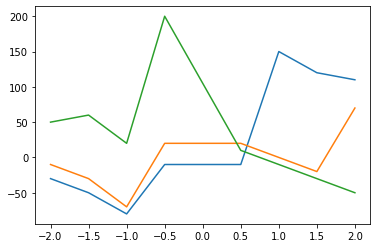

In [45]:
plt.plot(np.array([-2.0,-1.5,-1.0,-0.5,0.5,1.0,1.5,2.0]),
         np.array([MU_cool_2,MU_cool_15,MU_cool_1,MU_cool_05,MU_warm_05,MU_warm_1,MU_warm_15,MU_warm_2]))
plt.plot(np.array([-2.0,-1.5,-1.0,-0.5,0.5,1.0,1.5,2.0]),
         np.array([PL_cool_2,PL_cool_15,PL_cool_1,PL_cool_05,PL_warm_05,PL_warm_1,PL_warm_15,PL_warm_2]))
plt.plot(np.array([-2.0,-1.5,-1.0,-0.5,0.5,1.0,1.5,2.0]),
         np.array([BS_cool_2,BS_cool_15,BS_cool_1,BS_cool_05,BS_warm_05,BS_warm_1,BS_warm_15,BS_warm_2]))
plt.show()

In [12]:
print('Second 12-h')
timeint = 1
print(' ')
print('MU -0.5: ', round(percent_change_scalar(new_murgion_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU -1.5: ', round(percent_change_scalar(new_murgion_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -0.5: ', round(percent_change_scalar(new_gomplum_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL -1.5: ', round(percent_change_scalar(new_gomplum_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -0.5: ', round(percent_change_scalar(new_gombasn_cool_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS -1.5: ', round(percent_change_scalar(new_gombasn_cool_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print(' ')
print('MU +0.5: ', round(percent_change_scalar(new_murgion_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('MU +1.5: ', round(percent_change_scalar(new_murgion_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +0.5: ', round(percent_change_scalar(new_gomplum_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('PL +1.5: ', round(percent_change_scalar(new_gomplum_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +0.5: ', round(percent_change_scalar(new_gombasn_warm_1[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))
print('BS +1.5: ', round(percent_change_scalar(new_gombasn_warm_2[timeint,:,:].sum(),new_control_orig_0[timeint,:,:].sum())))

Second 12-h
 
MU -0.5:  19.0
MU -1.5:  10.0
PL -0.5:  2.0
PL -1.5:  -7.0
BS -0.5:  25.0
BS -1.5:  32.0
 
MU +0.5:  5.0
MU +1.5:  1.0
PL +0.5:  -20.0
PL +1.5:  -6.0
BS +0.5:  -20.0
BS +1.5:  -20.0
